In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('Data/Psychedelic_mushroom_DATA.csv')
df.head(5)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
0,1,1.0,1.0,1.0,1.0,1.0,2.0,0,19.0,3.0,...,0,0,1,0,0,2,3,0,0,57772.54
1,2,1.0,1.0,1.0,1.0,1.0,2.0,0,21.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42
2,3,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,1,0,0,0,0,3,4,0,0,42172.56
3,4,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,0,1,0,0,3,3,0,1,28356.81
4,5,1.0,1.0,1.0,1.0,1.0,2.0,0,23.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42


In [3]:
df['COHORTS'].value_counts()

 0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64

In [4]:
def labelize(cohort):
    if cohort == 0:
        return 0
    else:
        return 1
df['PM_use'] = df['COHORTS'].apply(labelize)

In [5]:
df.head(5)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT,PM_use
0,1,1.0,1.0,1.0,1.0,1.0,2.0,0,19.0,3.0,...,0,1,0,0,2,3,0,0,57772.54,1
1,2,1.0,1.0,1.0,1.0,1.0,2.0,0,21.0,2.0,...,0,1,0,0,3,3,0,1,25738.42,1
2,3,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,0,0,0,3,4,0,0,42172.56,1
3,4,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,1,0,0,3,3,0,1,28356.81,1
4,5,1.0,1.0,1.0,1.0,1.0,2.0,0,23.0,2.0,...,0,1,0,0,3,3,0,1,25738.42,1


In [6]:
df['PM_use'].value_counts()

0    6613
1     526
Name: PM_use, dtype: int64

## Chi-squared Test

Top3 important features: Ranked 1st: PSY1_POSITIVE_USE & BMI; Ranked 3rd: PCS12 & MCS12

Top3. PCS12: Physical health composite score (Veterans-RAND 12-item)

In [7]:
print('PM use value counts before coded:', df['COHORTS'].value_counts())
print('PM use value counts:', df['PM_use'].value_counts())
print('Knowledge of positive use:', df['PCS12'].value_counts())
contigency1 = pd.crosstab(df['PCS12'], df['PM_use']) 
contigency1

PM use value counts before coded:  0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64
PM use value counts: 0    6613
1     526
Name: PM_use, dtype: int64
Knowledge of positive use: 54.81    88
55.74    64
54.56    45
55.88    44
55.99    41
         ..
51.09     1
40.97     1
18.90     1
33.46     1
55.18     1
Name: PCS12, Length: 3060, dtype: int64


PM_use,0,1
PCS12,,
2.94,1,0
5.61,1,0
5.94,1,0
6.56,1,0
6.69,1,0
...,...,...
66.41,0,1
67.11,1,0
68.45,1,0


In [8]:
contigency1_pct = pd.crosstab(df['PCS12'], df['PM_use'], normalize='columns')
contigency1_pct

PM_use,0,1
PCS12,,
2.94,0.000151,0.000000
5.61,0.000151,0.000000
5.94,0.000151,0.000000
6.56,0.000151,0.000000
6.69,0.000151,0.000000
...,...,...
66.41,0.000000,0.001901
67.11,0.000151,0.000000
68.45,0.000151,0.000000


In [11]:
# Chi-square test of independence:
# chi2: The test statistic
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies, based on the marginal sums of the table

from scipy.stats import chi2_contingency
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contigency1) 

# Print all the values
print("chi2 value:", chi2_1)
print("p-value:", p_1)
print("degree of freedom:", dof_1)
print("the expected frequencies:", expected_1)

# interpret p-value
alpha = 0.05
if p_1 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

chi2 value: 3525.5596579018775
p-value: 6.187802995972451e-09
degree of freedom: 3059
the expected frequencies: [[0.92632021 0.07367979]
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]
 ...
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]]
Dependent (reject H0)


Top3. MCS12: Mental health composite score (Veterans-RAND 12-item)

In [12]:
print('PM use value counts before coded:', df['COHORTS'].value_counts())
print('PM use value counts:', df['PM_use'].value_counts())
print('Knowledge of positive use:', df['MCS12'].value_counts())
contigency2 = pd.crosstab(df['MCS12'], df['PM_use']) 
contigency2

PM use value counts before coded:  0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64
PM use value counts: 0    6613
1     526
Name: PM_use, dtype: int64
Knowledge of positive use: 59.31    89
62.88    63
56.33    44
59.34    42
62.89    42
         ..
58.32     1
46.41     1
52.88     1
68.27     1
46.86     1
Name: MCS12, Length: 3309, dtype: int64


PM_use,0,1
MCS12,,
0.69,1,0
0.94,1,0
2.98,1,0
3.49,1,0
5.22,1,0
...,...,...
70.09,1,0
70.15,1,0
70.40,1,0


In [13]:
contigency2_pct = pd.crosstab(df['MCS12'], df['PM_use'], normalize='columns')
contigency2_pct

PM_use,0,1
MCS12,,
0.69,0.000151,0.0
0.94,0.000151,0.0
2.98,0.000151,0.0
3.49,0.000151,0.0
5.22,0.000151,0.0
...,...,...
70.09,0.000151,0.0
70.15,0.000151,0.0
70.40,0.000151,0.0


In [15]:
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contigency2) 

# Print all the values
print("chi2 value:", chi2_2)
print("p-value:", p_2)
print("degree of freedom:", dof_2)
print("the expected frequencies:", expected_2)

# interpret p-value
alpha = 0.05
if p_2 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

chi2 value: 3865.381922111825
p-value: 3.764949392923887e-11
degree of freedom: 3308
the expected frequencies: [[0.92632021 0.07367979]
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]
 ...
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]]
Dependent (reject H0)


Top1. BMI: Calculated from self-reported height and weight

In [16]:
print('PM use value counts before coded:', df['COHORTS'].value_counts())
print('PM use value counts:', df['PM_use'].value_counts())
print('Politics factor:', df['BMI'].value_counts())
contigency3 = pd.crosstab(df['BMI'], df['PM_use']) 
contigency3

PM use value counts before coded:  0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64
PM use value counts: 0    6613
1     526
Name: PM_use, dtype: int64
Politics factor: 25.82    62
24.41    47
25.84    47
26.62    44
27.12    43
         ..
48.25     1
41.71     1
32.81     1
24.79     1
34.61     1
Name: BMI, Length: 1551, dtype: int64


PM_use,0,1
BMI,,
11.16,1,0
11.26,1,0
12.17,1,0
12.71,1,0
12.77,0,1
...,...,...
66.56,2,0
67.65,1,0
69.53,1,0


In [17]:
contigency3_pct = pd.crosstab(df['BMI'], df['PM_use'], normalize='columns')
contigency3_pct

PM_use,0,1
BMI,,
11.16,0.000151,0.000000
11.26,0.000151,0.000000
12.17,0.000151,0.000000
12.71,0.000151,0.000000
12.77,0.000000,0.001901
...,...,...
66.56,0.000302,0.000000
67.65,0.000151,0.000000
69.53,0.000151,0.000000


In [18]:
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(contigency3) 

# Print all the values
print("chi2 value:", chi2_3)
print("p-value:", p_3)
print("degree of freedom:", dof_3)
print("the expected frequencies:", expected_3)

# interpret p-value
alpha = 0.05
if p_3 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

chi2 value: 1629.3411098920262
p-value: 0.07878097863678024
degree of freedom: 1550
the expected frequencies: [[0.92632021 0.07367979]
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]
 ...
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]
 [0.92632021 0.07367979]]
Independent (H0 holds true)


Top1. PSY1_POSITIVE_USE: In the last 6 months  heard more than usual about the positive uses of psychedelic drugs for mental health issues (depression, PTSD, addiction, etc.)

In [19]:
print('PM use value counts before coded:', df['COHORTS'].value_counts())
print('PM use value counts:', df['PM_use'].value_counts())
print('Covid factor:', df['PSY1_POSITIVE_USE'].value_counts())
contigency4 = pd.crosstab(df['PSY1_POSITIVE_USE'], df['PM_use']) 
contigency4

PM use value counts before coded:  0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64
PM use value counts: 0    6613
1     526
Name: PM_use, dtype: int64
Covid factor: 3    2242
5    1982
4    1306
2    1039
1     570
Name: PSY1_POSITIVE_USE, dtype: int64


PM_use,0,1
PSY1_POSITIVE_USE,,
1,386,184
2,826,213
3,2147,95
4,1285,21
5,1969,13


In [20]:
contigency4_pct = pd.crosstab(df['PSY1_POSITIVE_USE'], df['PM_use'], normalize='columns')
contigency4_pct

PM_use,0,1
PSY1_POSITIVE_USE,,
1,0.058370,0.349810
2,0.124905,0.404943
3,0.324664,0.180608
4,0.194314,0.039924
5,0.297747,0.024715


<Axes: xlabel='PM_use', ylabel='PSY1_POSITIVE_USE'>

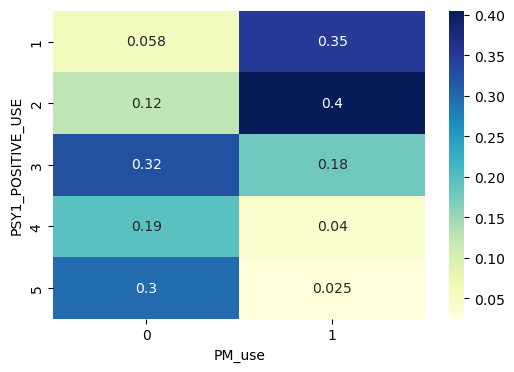

In [21]:
# plot a heatmap
plt.figure(figsize=(6, 4)) 
sns.heatmap(contigency4_pct, annot=True, cmap="YlGnBu")

In [22]:
chi2_4, p_4, dof_4, expected_4 = chi2_contingency(contigency4) 

# Print all the values
print("chi2 value:", chi2_4)
print("p-value:", p_4)
print("degree of freedom:", dof_4)
print("the expected frequencies:", expected_4)

# interpret p-value
alpha = 0.05
if p_4 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

chi2 value: 1007.3879509545408
p-value: 8.943633683269309e-217
degree of freedom: 4
the expected frequencies: [[ 528.00252136   41.99747864]
 [ 962.44670122   76.55329878]
 [2076.80991736  165.19008264]
 [1209.77419807   96.22580193]
 [1835.966662    146.033338  ]]
Dependent (reject H0)
